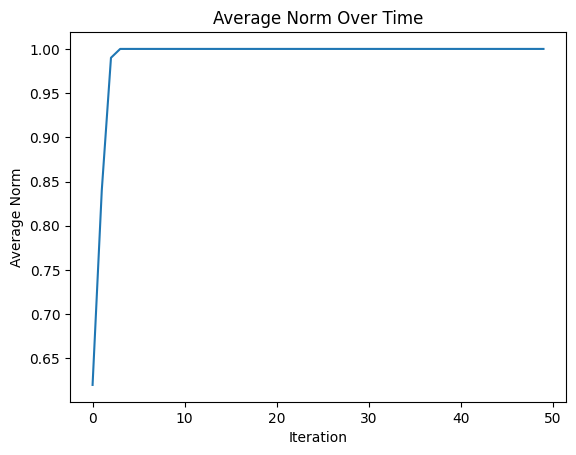

In [9]:
"""
Soru: NORM SHIFTING: AN AGENT-BASED MODEL ile ilgili python kodu getirebilir misin

Cevap: "Norm Shifting: An Agent-Based Model" konusundaki Python kodu, genellikle sosyal normların ajan tabanlı bir modelde nasıl değiştiğini inceleyen bir simülasyon olabilir. Bu tür bir modelde, ajanlar sosyal normları öğrenir ve bunlara göre davranışlarını değiştirirler. Basit bir örnek üzerinde duralım.

Aşağıdaki örnek, sosyal normların ajanlar arasında nasıl yayıldığını ve zamanla nasıl değiştiğini inceleyen temel bir Python kodu içermektedir. Bu modelde, ajanlar bir norma uyarlar veya normu değiştirmeye karar verirler.

"""


import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, id, norm):
        self.id = id
        self.norm = norm

    def update_norm(self, neighbors):
        # Basit bir karar kuralı: komşuların normlarının çoğunluğuna uyma
        neighbor_norms = [neighbor.norm for neighbor in neighbors]
        if neighbor_norms:
            self.norm = max(set(neighbor_norms), key=neighbor_norms.count)

class Simulation:
    def __init__(self, num_agents, norm_distribution, num_iterations):
        self.num_agents = num_agents
        self.num_iterations = num_iterations
        self.agents = [Agent(i, norm_distribution[i]) for i in range(num_agents)]
        self.network = self.create_network()

    def create_network(self):
        # Basit bir rastgele bağlantı ağı oluşturma
        network = {i: [] for i in range(self.num_agents)}
        for i in range(self.num_agents):
            for j in range(i + 1, self.num_agents):
                if np.random.rand() < 0.1:  # Bağlantı olasılığı
                    network[i].append(self.agents[j])
                    network[j].append(self.agents[i])
        return network

    def run(self):
        history = []
        for _ in range(self.num_iterations):
            for agent in self.agents:
                neighbors = self.network[agent.id]
                agent.update_norm(neighbors)
            norms = [agent.norm for agent in self.agents]
            history.append(np.mean(norms))
        return history

def plot_results(history):
    plt.plot(history)
    plt.xlabel('Iteration')
    plt.ylabel('Average Norm')
    plt.title('Average Norm Over Time')
    plt.show()

if __name__ == "__main__":
    num_agents = 100
    initial_norms = np.random.choice([0, 1], size=num_agents)  # İki farklı norm
    num_iterations = 50

    sim = Simulation(num_agents, initial_norms, num_iterations)
    history = sim.run()
    plot_results(history)
